In [1]:
#
# Create a classifier for digits '1' and '0'
# Train with CNN
# ADD DATA AUGMENTATION
# Shift the digit '1' to the left and to the right 
# Evaluate the model with shifted images
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/ml101/')
train_zero_dir = os.path.join(path_base+'/ml101/0/')
train_one_dir = os.path.join(path_base+'/ml101/1/')

# print directories with training images
print(train_zero_dir)
print(train_one_dir)

# print filename from each directory
train_zero_names = os.listdir(train_zero_dir)
print(train_zero_names[0])
train_one_names = os.listdir(train_one_dir)
print(train_one_names[0])

# print total training images
print("Total training zero images= ", len(os.listdir(train_zero_dir)))
print("Total training one images= ", len(os.listdir(train_one_dir)))

/home/watson/github/ml-classifier-no-common-sense/ml101/0/
/home/watson/github/ml-classifier-no-common-sense/ml101/1/
img_41774.jpg
img_27984.jpg
Total training zero images=  4132
Total training one images=  4684


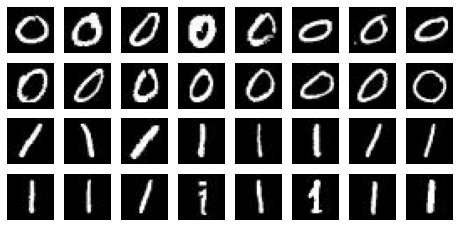

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_zero_dir, fname)
                for fname in train_zero_names[pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_one_dir, fname)
                for fname in train_one_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [3]:
#
# From basic CNN, if the '1' is shifted to the left or the right
# then the classifier mistakes the one to '0'

#https://github.com/lamateos123/ml-classifier-no-common-sense/blob/main/mnist_1_0_basic.ipynb

In [4]:
#
# CNN
#
import tensorflow as tf
print(tf.__version__)

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )

2.6.2


In [5]:
#
# DATA AUGMENTATION
#
# let's do it only in the ones
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        path_dir,  # This is the source directory for training images
        target_size=(28, 28),  # All images will be resized to 28x28
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



Found 8816 images belonging to 2 classes.


In [6]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=5,
                   verbose=2)

Epoch 1/5
8/8 - 2s - loss: 0.5151 - accuracy: 0.7619
Epoch 2/5
8/8 - 1s - loss: 0.2759 - accuracy: 0.8770
Epoch 3/5
8/8 - 1s - loss: 0.1285 - accuracy: 0.9521
Epoch 4/5
8/8 - 1s - loss: 0.1380 - accuracy: 0.9512
Epoch 5/5
8/8 - 1s - loss: 0.0790 - accuracy: 0.9766


In [7]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image

def common(path_directory,path_split):
    paths = []
    path = path_directory#train_one_dir#path_base+'imnist/1/'

    # setting the pahts to look for the images
    one_names = os.listdir(path)

    # show some images from '0'
    nrows, ncols = 8,8
    pic_index = 0

    fig = plt.gcf()
    fig.set_size_inches(ncols*1, nrows*1)

    pic_index += 16
    next_one__pix = [os.path.join(path, fname)
                    for fname in one_names[pic_index-16:pic_index]]

    for i, img_path in enumerate(next_one__pix):
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('off')

        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')

    plt.show()


    for f in os.listdir(path):
        paths.append(os.path.join(path,f))

    #from skimage import io

    i=0
    for path in paths:
        img = image.load_img(path, target_size=(28,28))

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        path_dir = path.split(path_split)#"ml101/")
        print(classes[0], path_dir[1])
        i+=1
        if i>=16:
            break

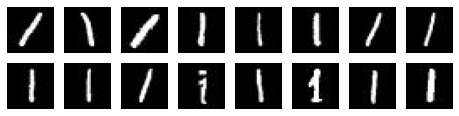

[1.] 1/img_27984.jpg
[1.] 1/img_2431.jpg
[1.] 1/img_23765.jpg
[1.] 1/img_41.jpg
[1.] 1/img_35385.jpg
[1.] 1/img_8810.jpg
[1.] 1/img_14260.jpg
[1.] 1/img_38189.jpg
[1.] 1/img_9831.jpg
[1.] 1/img_40088.jpg
[1.] 1/img_15043.jpg
[1.] 1/img_19811.jpg
[1.] 1/img_22933.jpg
[1.] 1/img_2238.jpg
[1.] 1/img_9036.jpg
[1.] 1/img_1171.jpg


In [8]:
#
# Evaluate test images with ONEs
#
common(train_one_dir,"ml101/")

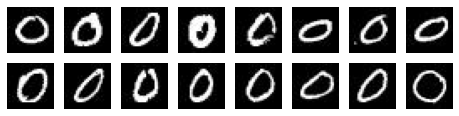

[0.] 0/img_41774.jpg
[0.] 0/img_1436.jpg
[0.] 0/img_27171.jpg
[0.] 0/img_27998.jpg
[0.] 0/img_21571.jpg
[0.] 0/img_35439.jpg
[0.] 0/img_38890.jpg
[0.] 0/img_17734.jpg
[0.] 0/img_31940.jpg
[0.] 0/img_14472.jpg
[0.] 0/img_4957.jpg
[0.] 0/img_26528.jpg
[0.] 0/img_14338.jpg
[0.] 0/img_1581.jpg
[0.] 0/img_404.jpg
[0.] 0/img_30127.jpg


In [9]:
#
# Evaluate test images with ZEROs
#
common(train_zero_dir,"ml101/")

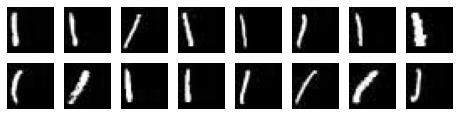

[0.] img_41.jpg
[0.] img_295.jpg
[1.] img_468.jpg
[0.] img_37.jpg
[0.] img_371.jpg
[0.] img_544.jpg
[0.] img_256.jpg
[1.] img_549.jpg
[0.] img_476.jpg
[1.] img_134.jpg
[0.] img_335.jpg
[0.] img_2.jpg
[0.] img_96.jpg
[1.] img_255.jpg
[1.] img_124.jpg
[1.] img_35.jpg


In [10]:
#
# ONEs shifted to the left
#
common(path_base+'/sl1/',"sl1/")

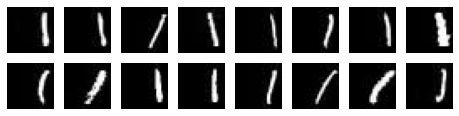

[0.] img_41.jpg
[0.] img_295.jpg
[1.] img_468.jpg
[1.] img_37.jpg
[0.] img_371.jpg
[0.] img_544.jpg
[0.] img_256.jpg
[1.] img_549.jpg
[1.] img_476.jpg
[1.] img_134.jpg
[0.] img_335.jpg
[0.] img_2.jpg
[1.] img_96.jpg
[1.] img_255.jpg
[1.] img_124.jpg
[0.] img_35.jpg


In [11]:
#
# ONEs shifted to the right
#
common(path_base+'/sr1/',"sr1/")

[0.]


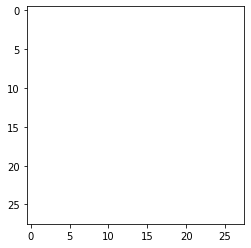

In [12]:
#
# A white image is 100% sure that is a ZERO
#
path = path_base+'/x/img_white.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

[0.7450031]


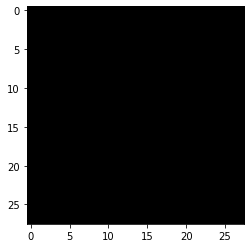

In [13]:
#
# A black image is a ONE
#
path = path_base+'/x/img_black.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])